## 작업환경설정

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

## 1단계: 데이터준비(여러데이터를 합치고 정리)

In [2]:
import glob
import os

all_files = glob.glob(os.path.join('wine*'))
all_files

['winequality-red.csv', 'winequality-white.csv']

In [3]:
all_data =[]
for file in all_files:
    data = pd.read_csv(file, sep=';')
    all_data.append(data)
wine = pd.concat(all_data, axis=0, ignore_index=True)
print(wine.shape)
wine.to_csv('winequality_both.csv')

(6497, 12)


In [4]:
white_wine = pd.read_csv("winequality-white.csv", sep=';')
white_wine['type'] = "white"
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [5]:
red_wine = pd.read_csv("winequality-red.csv", sep=';')
red_wine['type'] = "red"
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
wine = pd.concat([red_wine, white_wine], axis=0, ignore_index=True)
print(wine.shape)
wine.tail()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [7]:
wine.columns = wine.columns.str.replace(' ', '_')
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [8]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
sorted(wine.quality.unique())

[3, 4, 5, 6, 7, 8, 9]

In [10]:
wine.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

## EDA : 탐색적분석

In [11]:
wine.groupby('type').quality.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


### T검정
- 와인종류에 따른 품질의 차이를 통계적으로 유의한지 알아보기 위해
- groupby를 사용해서 그룹별 품질의 평균과 표준편차를 구함
- 표준편차가 작으므로 t검정 실시
- p값은 0.05 이하이면 통계적으로 유의한 수준 - 두그룹간 품질차이가 통계적으로 유의함


In [12]:
wine.groupby('type').quality.agg(['std', 'mean'])

,std,mean
type,,
red,0.807569,5.636023
white,0.885639,5.877909


In [13]:
red =  wine.loc[wine['type'] == 'red', 'quality']
white = wine.loc[wine['type'] =='white', 'quality']

In [14]:
tstat, pvalue, df = sm.stats.ttest_ind(red, white)
print('tstat:%.3f  pvalue:%.4f'%(tstat, pvalue))

tstat:-9.686  pvalue:0.0000


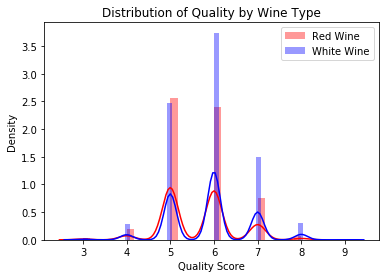

In [15]:
sns.distplot(red, color='red', label='Red Wine')
sns.distplot(white, color ='blue', label='White Wine')
plt.xlabel('Quality Score')
plt.ylabel('Density')
plt.title('Distribution of Quality by Wine Type')
plt.legend()

- 상관관계분석

In [16]:
wine.corrwith(wine.quality).sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric_acid             0.085532
free_sulfur_dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual_sugar         -0.036980
total_sulfur_dioxide   -0.041385
fixed_acidity          -0.076743
chlorides              -0.200666
volatile_acidity       -0.265699
density                -0.305858
dtype: float64

In [17]:
def take_sample(data, n=300):
    return data.loc[np.random.choice(data.index, size=n)]

In [18]:
white_sample = take_sample(white_wine)
print(white_sample.shape)
white_sample

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4248,5.9,0.14,0.20,1.6,0.040,26.0,114.0,0.99105,3.25,0.45,11.4,6,white
849,6.0,0.20,0.24,1.8,0.030,30.0,105.0,0.99090,3.31,0.47,11.5,6,white
4563,5.6,0.26,0.27,10.6,0.030,27.0,119.0,0.99470,3.40,0.34,10.7,7,white
3586,5.8,0.28,0.28,4.2,0.044,52.0,158.0,0.99200,3.35,0.44,10.7,7,white
2079,7.4,0.45,0.32,7.1,0.044,17.0,117.0,0.99620,3.32,0.41,10.4,4,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4757,6.0,0.38,0.26,3.5,0.035,38.0,111.0,0.98872,3.18,0.47,13.6,7,white
2617,6.5,0.18,0.41,14.2,0.039,47.0,129.0,0.99678,3.28,0.72,10.3,7,white
793,5.9,0.24,0.30,2.0,0.033,28.0,92.0,0.99225,3.39,0.69,10.9,7,white
1309,9.4,0.17,0.55,1.6,0.049,14.0,94.0,0.99490,3.02,0.61,10.3,6,white


In [19]:
red_sample = take_sample(red_wine)
print(red_sample.shape)
red_sample

(300, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
428,9.1,0.520,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5,red
302,8.3,0.705,0.12,2.6,0.092,12.0,28.0,0.99940,3.51,0.72,10.0,5,red
1189,8.8,0.955,0.05,1.8,0.075,5.0,19.0,0.99616,3.30,0.44,9.6,4,red
419,6.8,0.770,0.00,1.8,0.066,34.0,52.0,0.99760,3.62,0.68,9.9,5,red
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.99630,3.25,0.63,9.2,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6,red
971,10.4,0.260,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.9,6,red
702,7.0,0.640,0.02,2.1,0.067,9.0,23.0,0.99700,3.47,0.67,9.4,6,red
805,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,7,red


In [20]:
wine_sample = pd.concat([red_sample, white_sample])

In [21]:
wine_sample.shape

(600, 13)

In [22]:
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1, 0)

In [23]:
wine.head(30)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,in_sample
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,0


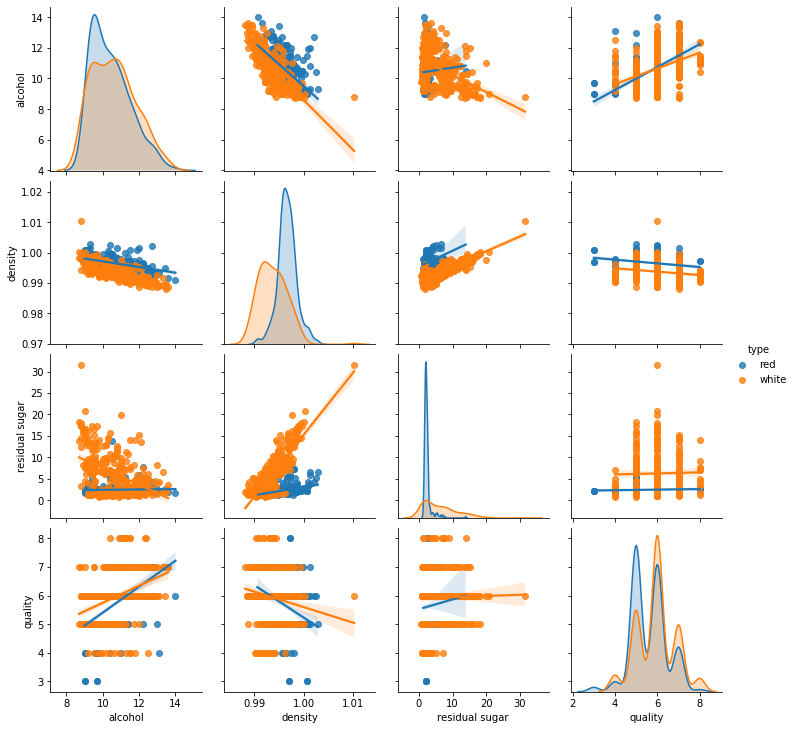

In [24]:
sns.pairplot(wine_sample, kind='reg', hue='type', vars = ['alcohol','density', 'residual sugar','quality'])

In [25]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'in_sample'],
      dtype='object')

In [26]:
wine.loc[wine.type == 'red', 'type_encode'] = 0

In [27]:
wine.loc[wine.type == 'white', 'type_encode'] = 1

In [28]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,in_sample,type_encode
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0.0


In [29]:
wine.corrwith(wine.quality).sort_values()

density                -0.305858
volatile_acidity       -0.265699
chlorides              -0.200666
fixed_acidity          -0.076743
total_sulfur_dioxide   -0.041385
residual_sugar         -0.036980
in_sample              -0.020332
pH                      0.019506
sulphates               0.038485
free_sulfur_dioxide     0.055463
citric_acid             0.085532
type_encode             0.119323
alcohol                 0.444319
quality                 1.000000
dtype: float64

In [30]:
my_formula = 'quality ~ alcohol + fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + sulphates + type_encode'

In [31]:
my_formula_simple = 'quality ~ alcohol + density + type_encode'

In [32]:
model = ols(my_formula, data=wine).fit()

In [33]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     244.6
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:13:09   Log-Likelihood:                -7210.4
No. Observations:                6497   AIC:                         1.444e+04
Df Residuals:                    6485   BIC:                         1.453e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               58.1944     11.353      5.126      0.000      35.938      80.451
alcohol                  0.2767      0.015     18.189      0.000       0.247       0.307
fixed_acidity            0.0255      0.011      2.219      0.027       0.003       0.048
volatile_acidity        -1.5252      0.081    -18.757      0.000      -1.685      -1.366
citric_acid             -0.0977      0.080     -1.227      0.220      -0.254       0.058
residual_sugar           0.0426      0.005      9.015      0.000       0.033       0.052
chlorides               -1.0665      0.330     -3.227      0.001      -1.714      -0.419
free_sulfur_dioxide      0.0052      0.001      6.750      0.000       0.004       0.007
total_sulfur_dioxide    -0.0015      0.000     -4.516      0.000      -0.002      -0.001
density                -55.4894     11.348     -4.890      0.000     -77.735     -33.244
sulphates                0.6941      0.076      9.103      0.000       0.545       0.844
type_encode             -0.3291      0.057     -5.817      0.000      -0.440      -0.218
==============================================================================
Omnibus:                      135.715   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.243
Skew:                           0.031   Prob(JB):                     7.74e-65
Kurtosis:                       4.042   Cond. No.                     2.35e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 독립변수의 표준화
- 회귀모형에서 사용하는 최소제곱법은 잔차의 제곱합을 최소화하는 회귀선을 찾아서 계수를 추정함
- 잔차: 관측값- 적합값
- 독립변수의 측정단위에 따라 잔차의 크기가 크게 달라질수 있음
- 표준화방법 : 변수의 관측값에서 평균을 빼고 그 결과를 표준편차로 나누는 것
- 표준화된 변수는 평균은 0이되고 표준편차는 1이 됨

In [34]:
y = wine['quality']
x = wine[wine.columns.difference(['quality', 'in_sample', 'type'])]
x_standardized = (x-x.mean())/x.std()

In [35]:
wine_standardized = pd.concat([x_standardized, y], axis=1)

In [36]:
model_standardized = ols(my_formula, data=wine_standardized).fit()

In [37]:
model_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     244.6
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        15:13:09   Log-Likelihood:                -7210.4
No. Observations:                6497   AIC:                         1.444e+04
Df Residuals:                    6485   BIC:                         1.453e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184      0.009    638.285      0.000       5.801       5.836
alcohol                  0.3300      0.018     18.189      0.000       0.294       0.366
fixed_acidity            0.0331      0.015      2.219      0.027       0.004       0.062
volatile_acidity        -0.2511      0.013    -18.757      0.000      -0.277      -0.225
citric_acid             -0.0142      0.012     -1.227      0.220      -0.037       0.008
residual_sugar           0.2026      0.022      9.015      0.000       0.159       0.247
chlorides               -0.0374      0.012     -3.227      0.001      -0.060      -0.015
free_sulfur_dioxide      0.0919      0.014      6.750      0.000       0.065       0.119
total_sulfur_dioxide    -0.0828      0.018     -4.516      0.000      -0.119      -0.047
density                 -0.1664      0.034     -4.890      0.000      -0.233      -0.100
sulphates                0.1033      0.011      9.103      0.000       0.081       0.126
type_encode             -0.1418      0.024     -5.817      0.000      -0.190      -0.094
==============================================================================
Omnibus:                      135.715   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.243
Skew:                           0.031   Prob(JB):                     7.74e-65
Kurtosis:                       4.042   Cond. No.                         9.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 예측하기
- 회귀모형에 학습하는데 사용하지 않은 새로운 데이터에 대한 예측
- 새로운 와인 관측값이 생겼을때 그 품질을 예측!

In [38]:
new_observations = wine.loc[wine.index.isin(range(30,40)), x.columns]

In [39]:
prediction = model.predict(new_observations)

In [40]:
prediction

30    5.217271
31    5.407704
32    5.185987
33    5.410543
34    5.452017
35    5.177957
36    5.522730
37    5.715306
38    4.384715
39    5.880247
dtype: float64

In [41]:
wine.loc[wine.index.isin(range(30, 40)), 'quality']

30    5
31    6
32    5
33    6
34    5
35    6
36    6
37    7
38    4
39    5
Name: quality, dtype: int64

In [42]:
wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type', 'in_sample',
       'type_encode'],
      dtype='object')

In [43]:
features = ["alcohol", 'density', 'type_encode', 'residual_sugar']

In [44]:
y = 'quality'

In [46]:
X = wine[features]
y = wine.quality

In [47]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=31)

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(5197, 4)
(5197,)
(1300, 4)
(5197,)


In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
model_A = LinearRegression()

In [60]:
model_B = RandomForestRegressor(n_estimators = 3000,
                               max_depth = 7,
                               max_features = 0.75,
                               random_state = 31)

In [67]:
model_B.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.75, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3000, n_jobs=None, oob_score=False,
                      random_state=31, verbose=0, warm_start=False)

In [61]:
model_A.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
prediction = model_A.predict(X_test)

In [68]:
prediction_B = model_B.predict(X_test)

In [69]:
prediction_B

array([5.831776  , 5.7256502 , 6.62218192, ..., 5.68868373, 5.812461  ,
       5.48777086])

In [64]:
from sklearn import metrics

In [66]:
metrics.mean_squared_error(y_test, prediction)

0.5286206686053628

In [70]:
metrics.mean_squared_error(y_test, prediction_B)

0.5084485182763229